<a href="https://colab.research.google.com/github/Ram2005-ui/us_accidents_data_analysis/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-1

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/data/US_Accidents_March23.csv")
print("Dataset shape:", df.shape)

Dataset shape: (7728394, 46)


1.How many unique values are there in categorical columns like City, State, and Weather_Condition? Which category is the most frequent in each?

In [4]:

unique_city = df['City'].nunique()
unique_state = df['State'].nunique()
unique_weather = df['Weather_Condition'].nunique()

print("Unique Cities:", unique_city)
print("Unique States:", unique_state)
print("Unique Weather Conditions:", unique_weather)


top_city = df['City'].value_counts().idxmax()
top_state = df['State'].value_counts().idxmax()
top_weather = df['Weather_Condition'].value_counts().idxmax()

print("Most Frequent City:", top_city)
print("Most Frequent State:", top_state)
print("Most Frequent Weather Condition:", top_weather)


Unique Cities: 13678
Unique States: 49
Unique Weather Conditions: 144
Most Frequent City: Miami
Most Frequent State: CA
Most Frequent Weather Condition: Fair


2.Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [10]:

missing_percent = df.isnull().mean() * 100
print("Missing values (% in each column):\n")
print(missing_percent.sort_values(ascending=False))
print("\n Columns with > 5% missing values:\n")
print(missing_percent[missing_percent > 5].sort_values(ascending=False))


Missing values (% in each column):

End_Lng                  48.713686
End_Lat                  48.713686
Precipitation(in)        31.101791
Wind_Chill(F)            28.260853
Wind_Speed(mph)           7.864783
Visibility(mi)            2.263362
Weather_Condition         2.225582
Humidity(%)               2.223893
Wind_Direction            2.196764
Temperature(F)            2.091385
Pressure(in)              1.792969
Weather_Timestamp         1.520480
Airport_Code              0.274179
Sunrise_Sunset            0.251388
Astronomical_Twilight     0.251388
Nautical_Twilight         0.251388
Civil_Twilight            0.251388
Street                    0.121313
Timezone                  0.097134
Zipcode                   0.024008
City                      0.003235
Description               0.000072
ID                        0.000000
Distance(mi)              0.000000
Start_Lng                 0.000000
Source                    0.000000
Severity                  0.000000
Start_Time         

3.Convert Start_Time and End_Time columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [16]:

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time']   = pd.to_datetime(df['End_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time'])
earliest = df['Start_Time'].min()
latest   = df['Start_Time'].max()
time_range = latest - earliest

print("Earliest Accident Start:", earliest)
print("Latest Accident Start:", latest)
print("Range of Accident Start Times:", time_range)


Earliest Accident Start: 2016-01-14 20:18:33
Latest Accident Start: 2023-03-31 23:30:00
Range of Accident Start Times: 2633 days 03:11:27


4.Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [15]:

duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
if duplicates > 0:
    print("\nExample duplicate rows:\n", df[df.duplicated()].head())
df = df.drop_duplicates()


Number of duplicate rows: 0


5.Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

Severity Distribution (%):
 Severity
1     0.964378
2    77.790990
3    18.600066
4     2.644567
Name: proportion, dtype: float64


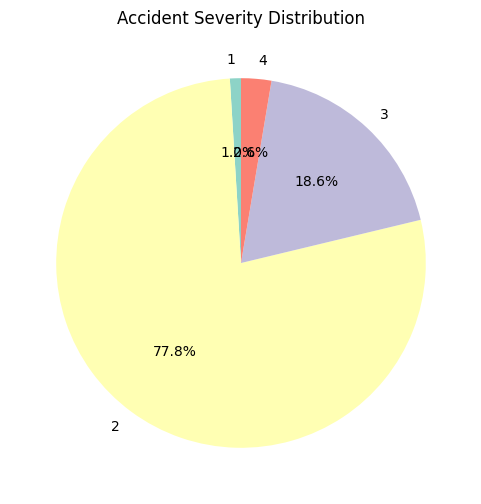

In [14]:

severity_percent = (df['Severity'].value_counts(normalize=True).sort_index() * 100)
print("Severity Distribution (%):\n", severity_percent)
plt.figure(figsize=(6,6))
plt.pie(severity_percent,labels=severity_percent.index,autopct="%.1f%%",startangle=90,colors=plt.cm.Set3.colors)
plt.title("Accident Severity Distribution")
plt.show()
